# Inferential statistics
## Part I - Data Cleaning

Your family is very passionate about basketball. You always have discussions over players, games, statistics and whatnot. As you can imagine those discussions never reach a conclusion since everyone is simply sharing their opinion with no statistics to back them up!

![](../images/basket.jpg)

Since you are attending a data analysis bootcamp you'd like to take advantage of your newfound knowledge to finally put an end to your family's discussions. 

Luckily we have found a dataset containing data related to the players of the WNBA for the 2016-2017 season that we can use. 

Let's start with cleaning the data and then we'll continue with a general exploratory analysis and some inferential statistics.

### Dataset

The dataset we will be using contains the statistics from the WNBA players for the 2016-2017 season. You will be able to find more information on the dataset in the [codebook](../data/codebook.md) uploaded to the repository.

### Libraries

First we'll import the necessary libraries first and increase the maximum number of displayed columns so you will be able to see all the dataset in the same window.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import binom
from scipy.stats import uniform

In [14]:
import pandas as pd
# pd.set_option('max_columns', 100)

### Load the dataset

Load the dataset into a df called `wnba` and take an initial look at it using the `head()` method.

In [105]:
#your code here
wnba = pd.read_csv('../data/wnba.csv')
wnba.shape

(143, 32)

### Check NaN values
As you know, one of our first steps is to check if there are any NaN values in the dataset to find any issues. Look for the columns that cointain NaN values and count how many rows there are with that value.

In [106]:
#your code here
wnba.isnull().sum()

Name            0
Team            0
Pos             0
Height          0
Weight          1
BMI             1
Birth_Place     0
Birthdate       0
Age             0
College         0
Experience      0
Games Played    0
MIN             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TO              0
PTS             0
DD2             0
TD3             0
dtype: int64

We can see that there are only two NaNs in the whole dataset, one in the Weight column and one in the BMI one. Let's look at the actual rows that contain the NaN values.

In [107]:
#your code here
wnba[wnba.isna().any(axis=1)]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
91,Makayla Epps,CHI,G,178,NaN,NaN,US,"June 6, 1995",22,Kentucky,...,2,0,2,4,1,0,4,6,0,0


It looks like there is only a single row that has NaN values in it, which is good! Just in case, let's check how much removing a single row may influence our dataset by calculating the percentage of values we will be removing.

In [108]:
#your code here
# 1:143 = x=100
nrows = wnba.shape[0]
perc = 1 * 100 / nrows
print('One row corresponds to',round(perc, 2),'% of the total dataset')

One row corresponds to 0.7 % of the total dataset


It is very important to be as careful as possible when dealing with NaN values and only drop data when it is strictly necessary. This decision can also be influenced by the nature of our analysis. If, for example, our analysis will not require the Weight and BMI of the players at all we can simply keep the row, given that the NaN values are only present in the Weight and BMI column.

In this specific example, let's say our decision is to drop it. Write some code to drop the NaN values. 

In [109]:
#your code here
# Drop row 91
# wnba = 
wnba = wnba.drop(index=91)
wnba.shape

(142, 32)

**Do you think it is a good decision? Think about a case in which you wouldn't want to drop the value.**

In [13]:
#your answer here
# I would not drop the values in the case for example in a dataset of 

### Let's make an overview of the dataset
First, check the data types of our data:

In [110]:
#your code here
wnba.dtypes

Name             object
Team             object
Pos              object
Height            int64
Weight          float64
BMI             float64
Birth_Place      object
Birthdate        object
Age               int64
College          object
Experience       object
Games Played      int64
MIN               int64
FGM               int64
FGA               int64
FG%             float64
3PM               int64
3PA               int64
3P%             float64
FTM               int64
FTA               int64
FT%             float64
OREB              int64
DREB              int64
REB               int64
AST               int64
STL               int64
BLK               int64
TO                int64
PTS               int64
DD2               int64
TD3               int64
dtype: object

It looks like most of the data types are correct. Birthdate column could be casted to a `datetime` type, however, we won't use it in our analysis so for simplicity, let's leave it as an `object`. Weight column could also be casted to an `int64` type as all numbers are integers.

**Let's change the type of Weight column for practice.**

In [119]:
#your code here
wnba = wnba.astype({'Weight': 'int64'})
wnba.dtypes

Name             object
Team             object
Pos              object
Height            int64
Weight            int64
BMI             float64
Birth_Place      object
Birthdate        object
Age               int64
College          object
Experience       object
Games Played      int64
MIN               int64
FGM               int64
FGA               int64
FG%             float64
3PM               int64
3PA               int64
3P%             float64
FTM               int64
FTA               int64
FT%             float64
OREB              int64
DREB              int64
REB               int64
AST               int64
STL               int64
BLK               int64
TO                int64
PTS               int64
DD2               int64
TD3               int64
dtype: object

**After checking the data types, let's check for outliers using the describe() method.**

In [136]:
#your code here
wnba.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,27.112676,24.429577,500.105634,74.401408,168.704225,43.102817,14.830986,...,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,3.667180,7.075477,289.373393,55.980754,117.165809,9.855199,17.372829,...,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,16.700000,0.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,24.000000,22.000000,242.250000,27.000000,69.000000,37.125000,0.000000,...,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.500000,506.000000,69.000000,152.500000,42.050000,10.500000,...,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,752.500000,105.000000,244.750000,48.625000,22.000000,...,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,...,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


In [ ]:
# I suspect there might be outliers in the columns
# BMI  -->  mean = 23 and min = 18, max = 31
# Games Played -->  mean = 24 and min = 2, max = 32

<function matplotlib.pyplot.show(close=None, block=None)>

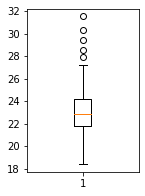

In [128]:
# Check for outliers in specific columns using the boxplot
plt.figure(figsize=(2,3))
plt.boxplot(x=wnba['BMI'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

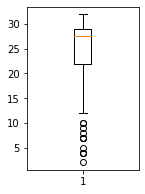

In [126]:
plt.figure(figsize=(2,3))
plt.boxplot(x=wnba['Games Played'])
plt.show

In [129]:
# There are too many columns to check them one by one
# We can then check for outliers using the interquartile range (IQR): outliers are defined
# as values that are smaller than (Q1 - 1.5 * IQR)  or bigger than (Q3 + 1.5 * IQR)
Q1 = wnba.quantile(0.25)
Q3 = wnba.quantile(0.75)
IQR = Q3 - Q1
# Print the IQR for each column
print(IQR)

Height           15.25000
Weight           14.50000
BMI               2.39484
Age               6.00000
Games Played      7.00000
MIN             510.25000
FGM              78.00000
FGA             175.75000
FG%              11.50000
3PM              22.00000
3PA              62.50000
3P%              36.17500
FTM              40.25000
FTA              49.25000
FT%              14.35000
OREB             24.00000
DREB             58.00000
REB              82.25000
AST              55.50000
STL              20.50000
BLK              10.00000
TO               34.00000
PTS             200.50000
DD2               1.00000
TD3               0.00000
dtype: float64


In [160]:
# Create a condition for outliers and filter the df based on this condition
outliers = (wnba < (Q1 - 1.5 * IQR)) | (wnba > (Q3 + 1.5 * IQR))
outliers_rows =  wnba[outliers == True]

/var/folders/qw/zs_98d4j48535kh5qwsd3fvr0000gn/T/ipykernel_17674/274288348.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (wnba < (Q1 - 1.5 * IQR)) | (wnba > (Q3 + 1.5 * IQR))


In [161]:
outliers_rows.dropna(axis=0, how='all')

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
12,NaN,NaN,NaN,NaN,113.0,29.414827,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment on your result. What do you see?**

In [20]:
#your answer here
# There are many outliers in the dataset. Out of 142 rows, 52 have at least one outlier. 
# However, this observation per se is not much relevant. It might simply indicate that the
# data about the different players are variable and there are players with some characteristics
# that differentiate them a lot from the rest of the players. All the outliers need a further
# exploration before taking any conclusion.

**Now we can save the cleaned data to a new .csv file called `wnba_clean.csv` in the data folder.**

In [149]:
#your code here
wnba.to_csv('../data/wnba_clean.csv')